In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

dias_habiles_por_año = 252
start_date = "2020-01-02"
end_date = "2024-01-30"
# portfolio = [
#     "GFNORTEO.MX",
#     "AC.MX",
#     "PINFRA.MX",
#     "GAPB.MX",
#     "GENTERA.MX",
#     "TLEVISACPO.MX",
#     "GCARSOA1.MX",
#     "GCC.MX",
#     "MEGACPO.MX",
#     "BIMBOA.MX",
# ]
portfolio = [
    "GFNORTEO.MX",
    "AC.MX",
    "PINFRA.MX"
]

In [2]:


# Restricción máxima de activos en portafolio:
if len(portfolio) > 10:
    raise Exception("El número máximo de activos en el portafolio es de 10")
else:
    # Se cumple la restricción:

    precios_diarios = pd.DataFrame()
    rendimientos_diarios = pd.DataFrame()

    for x in portfolio:
        stock = yf.Ticker(x)
        close_price = stock.history(start=start_date, end=end_date)["Close"]

        # Se insertan datos en precios_diarios y rendimientos_diarios
        precios_diarios = pd.concat([precios_diarios, close_price], axis=1)
        # Con pct_change() obtenemos los rendimientos (cambio porcentual)
        rendimientos_diarios = pd.concat([rendimientos_diarios, close_price.pct_change()], axis=1)

# Asignamos nombre de acciones a las columnas de cada DataFrame

precios_diarios.columns = portfolio
rendimientos_diarios.columns = portfolio

# Eliminamos valores nulos de las columnas con dropna()
# (El primer valor de rendimiento es nulo)

rendimientos_diarios = rendimientos_diarios.dropna()

# Ver los datos generados:
print("Precios diarios  "+start_date+"  Hasta  "+end_date)
display(precios_diarios)
print("Rendimientos diarios  "+start_date+"Hasta  "+end_date)
display(rendimientos_diarios)
# Ejecutamos

Precios diarios  2020-01-02  Hasta  2024-01-30


,GFNORTEO.MX,AC.MX,PINFRA.MX
2020-01-02 00:00:00-06:00,87.720520,85.542023,165.391922
2020-01-03 00:00:00-06:00,87.960495,86.305725,168.349808
2020-01-06 00:00:00-06:00,88.056488,85.982605,166.488510
2020-01-07 00:00:00-06:00,85.496712,86.792465,167.274200
2020-01-08 00:00:00-06:00,87.016579,86.507126,171.778336
...,...,...,...
2024-01-23 00:00:00-06:00,167.679993,181.610001,167.669998
2024-01-24 00:00:00-06:00,168.729996,180.570007,168.600006
2024-01-25 00:00:00-06:00,170.320007,183.389999,168.869995
2024-01-26 00:00:00-06:00,170.869995,186.899994,169.789993


Rendimientos diarios  2020-01-02Hasta  2024-01-30


,GFNORTEO.MX,AC.MX,PINFRA.MX
2020-01-03 00:00:00-06:00,0.002736,0.008928,0.017884
2020-01-06 00:00:00-06:00,0.001091,-0.003744,-0.011056
2020-01-07 00:00:00-06:00,-0.029070,0.009419,0.004719
2020-01-08 00:00:00-06:00,0.017777,-0.003288,0.026927
2020-01-09 00:00:00-06:00,0.037599,-0.005821,-0.009955
...,...,...,...
2024-01-23 00:00:00-06:00,0.007147,0.010179,-0.005575
2024-01-24 00:00:00-06:00,0.006262,-0.005727,0.005547
2024-01-25 00:00:00-06:00,0.009423,0.015617,0.001601
2024-01-26 00:00:00-06:00,0.003229,0.019140,0.005448


In [3]:


rendimientos_esperados = rendimientos_diarios.mean() * dias_habiles_por_año * 100
riesgo_individual = rendimientos_diarios.std() * np.sqrt(dias_habiles_por_año) * 100
# Ver datos generados:
print("Rendimientos esperados")
print(rendimientos_esperados)
print("Riesgo individual")
print(riesgo_individual)

Rendimientos esperados
GFNORTEO.MX    23.531991
AC.MX          22.136542
PINFRA.MX       4.585875
dtype: float64
Riesgo individual
GFNORTEO.MX    37.707130
AC.MX          22.627319
PINFRA.MX      27.947840
dtype: float64


In [4]:
# Calcular la matriz de covarianza de los rendimientos diarios
matriz_covarianza = rendimientos_diarios.cov()

# Imprimir o utilizar la matriz de covarianza según sea necesario
matriz_covarianza

,GFNORTEO.MX,AC.MX,PINFRA.MX
GFNORTEO.MX,0.000564,0.000073,0.000113
AC.MX,0.000073,0.000203,0.000059
PINFRA.MX,0.000113,0.000059,0.000310


In [5]:
# Crear DataFrame de ejemplo (reemplaza esto con tus propios datos)
data = {'Empresa': portfolio}
df_portfolio = pd.DataFrame(data)


# Agregar también la proporción subóptima al DataFrame original
df_portfolio['Peso'] = 1/len(portfolio)

# Ver los datos generados:
print('DataFrame con portafolio subóptimo y proporción subóptima:')
df_portfolio=df_portfolio.set_index("Empresa")

DataFrame con portafolio subóptimo y proporción subóptima:


In [6]:
# Calcular la varianza del portafolio en Python
def varianza_portafolio(portafolio,covarianza):
    varianza= portafolio.T @ covarianza @ portafolio
    return varianza.values[0, 0]

def rend_portafolio(peso,rendimientos):
    suma_producto= peso @ rendimientos
    return suma_producto

def riesgo_portafolio(varianza,dias):
    riesgo= np.sqrt(varianza)*np.sqrt(dias)
    return riesgo

In [7]:
# Varianza del portafolio subóptimo
var_portafolio = varianza_portafolio(df_portfolio,matriz_covarianza)


# Rendimiento esperado del portafolio subóptimo
rendimiento_esperado_portafolio = rend_portafolio(df_portfolio["Peso"].astype(float),rendimientos_esperados)


# Riesgo del portafolio subóptimo
risk_portafolio = riesgo_portafolio(var_portafolio,252)

# Ver datos generados:
print('Portafolio subóptimo')
print(f'Rendimiento esperado: {rendimiento_esperado_portafolio}')
print(f'Riesgo: {risk_portafolio*100}')
print(f'Varianza: {var_portafolio}')
# 


Portafolio subóptimo
Rendimiento esperado: 16.751469719627384
Riesgo: 20.958039002837143
Varianza: 0.0001743013487477948


In [8]:
def funcion_riesgo(pesos, matriz_covarianza, dias):
    varianza = np.dot(np.dot(pesos, matriz_covarianza), pesos)
    riesgo = np.sqrt(varianza) * np.sqrt(dias)
    return riesgo

restricciones = [
    {'type': 'eq', 'fun': lambda pesos: sum(pesos) - 1},
]

# Inicialización de pesos
pesos_iniciales = np.ones(len(portfolio)) / len(portfolio)

# Optimización
resultado = minimize(funcion_riesgo, pesos_iniciales, args=(matriz_covarianza, dias_habiles_por_año),
                     constraints=restricciones)

# Obtener los pesos óptimos del portafolio
pesos_optimos = resultado.x

df_portfolio['Peso_Optimo'] = pesos_optimos
df_portfolio


,Peso,Peso_Optimo
Empresa,,
GFNORTEO.MX,0.333333,0.117510
AC.MX,0.333333,0.572392
PINFRA.MX,0.333333,0.310098


In [9]:
df_portfolio_optimo = df_portfolio.drop('Peso', axis=1)

# Varianza del portafolio subóptimo
var_portafolio_optimo = varianza_portafolio(df_portfolio_optimo,matriz_covarianza)


# Rendimiento esperado del portafolio subóptimo
rendimiento_esperado_portafolio_optimo = rend_portafolio(df_portfolio["Peso_Optimo"].astype(float),rendimientos_esperados)


# Riesgo del portafolio subóptimo
risk_portafolio_optimo = riesgo_portafolio(var_portafolio_optimo,252)

# Ver datos generados:
print('Portafolio subóptimo')
print(f'Rendimiento esperado: {rendimiento_esperado_portafolio_optimo}')
print(f'Riesgo: {risk_portafolio_optimo*100}')
print(f'Varianza: {var_portafolio_optimo}')
# 

Portafolio subóptimo
Rendimiento esperado: 16.858089626304455
Riesgo: 18.997391183480676
Varianza: 0.00014321463165801166


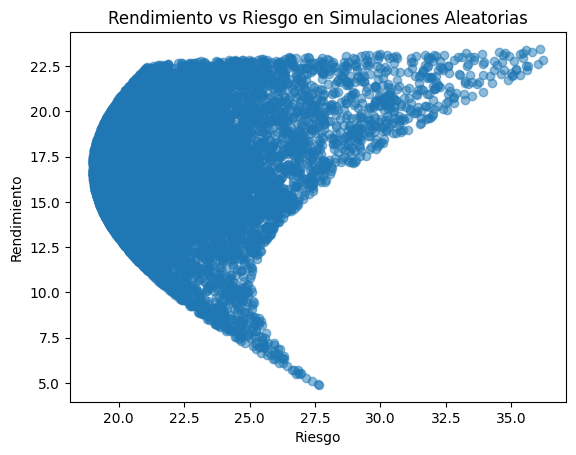

In [10]:
# Número de simulaciones
num_simulaciones = 10000

# Lista para almacenar los resultados de rendimiento y riesgo
rendimientos = []
riesgos = []

# Realiza simulaciones aleatorias
for _ in range(num_simulaciones):
    # Genera pesos aleatorios
    pesos_simulacion = np.random.rand(len(portfolio))
    pesos_simulacion /= np.sum(pesos_simulacion)  # Normaliza para asegurarse de que sumen 1
    # Calcula rendimiento y riesgo
    rendimiento = np.dot(pesos_simulacion, rendimientos_esperados)
    riesgo = np.sqrt(np.dot(np.dot(pesos_simulacion, matriz_covarianza), pesos_simulacion) * dias_habiles_por_año)*100

    # Almacena resultados
    rendimientos.append(rendimiento)
    riesgos.append(riesgo)

# Convierte las listas a arrays de NumPy para facilitar su manipulación
rendimientos = np.array(rendimientos)
riesgos = np.array(riesgos)

# Grafica el rendimiento vs riesgo
plt.scatter(riesgos, rendimientos, alpha=0.5)
plt.title('Rendimiento vs Riesgo en Simulaciones Aleatorias')
plt.xlabel('Riesgo')
plt.ylabel('Rendimiento')
plt.show()